# Day7
* 이미지 전처리
* 전이학습
* 이미지 데이터 증강

## 이미지 전처리: 컴퓨터 비전 (opencv)
* 반드시 해야하는 전처리 (신경망의 input_shape에 맞추는 작업)
    - cv2.resize()
    - 컬러공간변환: cv2.cvtColor()
    
* 선택적으로 할 수 있는 전처리
    - 화질개선: 정규화, 히스토그램 평활화, 잡음제거(가우시안 필터)
    - 객체강조: 마스킹(이진화), 모폴로지

# opencv-python 설치
* 아나콘다 프롬프트에서 
    - 가상환경 활성화: conda activate mytf23
    - opencv-python 설치: pip install opencv-python 

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
cv2.__version__

In [ ]:
import matplotlib.pyplot as plt
def myimshow(array):
    fig, ax = plt.subplots(1, 1)
    ax.imshow(array[:,:,::-1])    
    # plt.show()
    return fig

In [ ]:
import cv2
src = cv2.imread('datasets/park.jpg')
print(type(src), src.shape)
myimshow(src)
plt.show()

## 크기 조정 (resize)

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
dst = cv2.resize(src, dsize=(28, 28))
fig1 = myimshow(src)
fig2 = myimshow(dst)
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
gray[5:10, 10:15]

In [ ]:
plt.imshow(gray[0:10, 0:15], cmap='gray')

In [ ]:
linear = cv2.resize(gray[5:10, 10:15], dsize=(10, 10))
linear

In [ ]:
cv2.resize?

In [ ]:
cv2.INTER*?

In [ ]:
gray[5:10, 10:15]

In [ ]:
nearest = cv2.resize(gray[5:10, 10:15], dsize=(10, 10), interpolation=cv2.INTER_NEAREST)
nearest

In [ ]:
cv2.resize?

In [ ]:
# 비율 기준으로 리사이즈

import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
dst = cv2.resize(src, dsize=(0, 0), fx=1.5, fy=1.2)
fig1 = myimshow(src)
fig2 = myimshow(dst)
plt.show()

## 컬러공간 변환

In [ ]:
cv2.cvtColor?

In [ ]:
# 컬러변환 코드
cv2.COLOR_*?

In [ ]:
# BGR => GRAY 변환코드
cv2.COLOR_BGR2GRAY

In [ ]:
# BGR => RGB 변환코드
cv2.COLOR_BGR2RGB

In [ ]:
cv2.COLOR_BGR*?

In [ ]:
cv2.COLOR_BGR2*?

In [ ]:
rgba = cv2.cvtColor(src, cv2.COLOR_BGR2RGBA)
print(rgba.shape)

In [ ]:
rgba[0:20, 0:20, 3] = 50
plt.imshow(rgba)
plt.show()

## 정규화

In [ ]:
f = myimshow(src)

In [ ]:
cv2.normalize?

In [ ]:
cv2.normalize?

In [ ]:
cv2.CV*?

In [ ]:
cv2.CV_*?

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cloudy = cv2.normalize(gray, None, 
                       0.0, 1.0, cv2.NORM_MINMAX, cv2.CV_32F) # 정규화

print(cv2.minMaxLoc(gray))
print(cv2.minMaxLoc(cloudy))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(cloudy, cmap='gray')
plt.show()

In [ ]:
cv2.CV*?

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cloudy = cv2.normalize(gray, None, 
                       100, 105, cv2.NORM_MINMAX, cv2.CV_8U) # 정규화

print(cv2.minMaxLoc(gray))
print(cv2.minMaxLoc(cloudy))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(cloudy, cmap='gray')
plt.show()

## 히스토그램 평활화

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(gray) # 히스토그램 평활화

print(cv2.minMaxLoc(gray))
print(cv2.minMaxLoc(dst))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(dst, cmap='gray')
plt.show()

## 잡음제거(가우시안 필터)

In [ ]:
cv2.GaussianBlur?

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst1 = cv2.GaussianBlur(gray, (3,3), 1.0) # 가우시안 필터링
dst2 = cv2.GaussianBlur(gray, (0,0), 1.0) # 가우시안 필터링
dst3 = cv2.GaussianBlur(gray, (0,0), 10.0) # 가우시안 필터링

fig, ax = plt.subplots(1, 4)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(dst1, cmap='gray')
ax[2].imshow(dst2, cmap='gray')
ax[3].imshow(dst3, cmap='gray')
plt.show()

## 이진화

In [ ]:
cv2.threshold?

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/park.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#ret, bImage = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) #  이진화
ret, bImage = cv2.threshold(gray, 100, 255, 
                            cv2.THRESH_BINARY | cv2.THRESH_OTSU) # 오츠알고리즘
print('ret:',ret)

fig, ax = plt.subplots(1,2)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(bImage, cmap='gray')
plt.show()


## 마스킹

In [ ]:
cv2.inRange?

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/graphleaf.JPG')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
bImage = cv2.inRange(hsv, (120, 0, 0), (180, 255, 255)) 
# 컬러피커로 정확한 lower boundary와 upper boundary를 먼저 찾아서 적용
print('ret:',ret)

fig, ax = plt.subplots(1,2)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(bImage, cmap='gray')
plt.show()

In [ ]:
cv2.THRESH_BINARY_INV

In [ ]:
cv2.THRESH_OTSU

In [ ]:
cv2.IMREAD*?

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread('datasets/graphleaf.JPG')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#ret, bImage = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) #  이진화
ret, bImage = cv2.threshold(gray, 100, 255, 
                            cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) # 오츠알고리즘
print('ret:',ret)

fig, ax = plt.subplots(1,2)
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(bImage, cmap='gray')
plt.show()

In [ ]:
# 마스킹
dst = cv2.bitwise_and(src, src, mask=bImage)
plt.imshow(dst)
plt.show()

## 모폴로지 (이진영상의 모양정리)

In [ ]:
cv2.*RECT*?

In [ ]:
cv2.morphologyEx?

In [ ]:
cv2.MORPH_*?

In [ ]:
import cv2

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst1 = cv2.erode(bImage, kernel) # 침식
dst2 = cv2.dilate(bImage, kernel) # 팽창
dst3 = cv2.morphologyEx(bImage, cv2.MORPH_OPEN, kernel) # 열기
dst4 = cv2.morphologyEx(bImage, cv2.MORPH_CLOSE, kernel) # 닫기

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
ax[0].imshow(bImage, cmap='gray')
ax[1].imshow(dst1, cmap='gray')
ax[2].imshow(dst2, cmap='gray')
ax[3].imshow(dst3, cmap='gray')
ax[4].imshow(dst4, cmap='gray')
plt.show()

In [ ]:
# 마스킹
dst = cv2.bitwise_and(src, src, mask=dst2)
plt.imshow(dst)
plt.show()

In [ ]:
fig = myimshow(dst) # 마스크이미지를 RGB 채널 순서 맞춰 보여주기

# 전이학습

전이학습(transfer learning): 
- 방대한 자료를 사용하여 미리 학습한 가중치를 가져와 내 프로젝트에 사용하는 방법
- 해당 영역(도메인)에서 정해진 작업을 잘 하는 검증된 신경망 아키텍처를 활용하는 방법


In [ ]:
preprocess_input?

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
ResNet50?

In [ ]:
model = ResNet50(weights='imagenet')
model.summary()

In [ ]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # 이미지 읽어들이며 리사이즈
print(type(img))

x = image.img_to_array(img) # PIL Image객체를 np array로 변환
print(type(x), x.shape)
x = np.expand_dims(x, axis=0) # 3차원 배열을 4차원 배열로 차원 증가
x = preprocess_input(x) # 컬러채널이 제일 마지막 채널이 되도록 해줌

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

# print('preds: ', preds)
print('Predicted:', decode_predictions(preds, top=10)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122

In [ ]:
np.where(preds>0.01)

# 우리의 작업에 맞추는 방법

In [ ]:
ResNet50?

In [ ]:
Dense?

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
Dropout?

In [ ]:
model = Sequential()
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
model.add(resnet)
model.add(Dense(4, activation="softmax"))
model.summary()

In [ ]:
from tensorflow import keras
keras.__version__

In [ ]:
from tensorflow.keras import utils
utils.to_categorical

In [ ]:
from tensorflow.keras.preprocessing import image
image.load_img?

In [ ]:
to_categorical?

In [6]:
# %load CNNBaseline.py
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

# 데이터 준비
import os
import numpy as np

train_dir = 'Grape/train'
test_dir = 'Grape/test'
WIDTH, HEIGHT, CHANNELS = 256, 256, 3

# 이미지 전처리 함수 정의
def imagePrep(dir_, HEIGHT, WIDTH):
    dirs = os.listdir(dir_)
    
    X_train = []
    y_train = []
    
    for i, d in enumerate(dirs):
        for fname in os.listdir(os.path.join(dir_, d)):
            fpath = os.path.join(dir_, d, fname)
            img = image.load_img(fpath, target_size=(HEIGHT, WIDTH)) # 이미지 읽어들이며 리사이즈
            img_ = image.img_to_array(img) # PIL Image객체를 np array로 변환
            X_train.append(img_/255.0)
            y_train.append(i)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = to_categorical(y_train)
    return X_train, y_train

In [7]:
X_train, y_train = imagePrep(train_dir, HEIGHT, WIDTH)
X_test, y_test = imagePrep(test_dir, HEIGHT, WIDTH)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(167, 256, 256, 3) (167, 4)
(32, 256, 256, 3) (32, 4)


In [8]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [9]:
# # CNN을 위한 설정
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

# model.summary()

# model.compile(loss='categorical_crossentropy',
#              optimizer='adam', 
#              metrics=['accuracy'])

# VGG16을 이용한 전이학습 모델 준비
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, CHANNELS))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(4, activation='softmax'))
finetune_model.summary()

finetune_model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(learning_rate=0.0002), 
                      metrics='accuracy')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     


Epoch 00001: val_loss improved from inf to 0.37665, saving model to ./finetune_model\01-0.3767.hdf5

Epoch 00002: val_loss improved from 0.37665 to 0.27126, saving model to ./finetune_model\02-0.2713.hdf5

Epoch 00003: val_loss improved from 0.27126 to 0.21788, saving model to ./finetune_model\03-0.2179.hdf5
1/1 [==============================] - 0s 21ms/step - loss: 0.2179 - accuracy: 0.9688

 Test Accurary: 0.9688


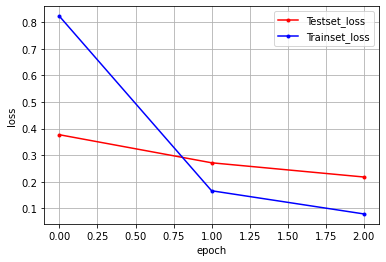

In [10]:
# 모델 최적화 설정
MODEL_DIR = './finetune_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./finetune_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = finetune_model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=3, batch_size=5, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accurary: %.4f' % (finetune_model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 제너레이터

In [ ]:
def myRange(stopindex=5):
    for i in range(stopindex):
        yield i

In [ ]:
mr = myRange(8)

In [ ]:
next(mr)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# numpy.random.shuffle([10, 20, 30, 40, 50])

# numpy.random.permutation(5) : [0, 1, 2, 3, 4] => 섞어줌

def myGenerator(X, y, batch_size=30):
    m = X.shape[0]
    shuffle_index = np.random.permutation(m)
    chunk_size = m // batch_size
    for i in range(chunk_size):
        indices = shuffle_index[i*batch_size:(i+1)*batch_size]
        yield X[indices], y[indices]

In [ ]:
mg = myGenerator(X, y, batch_size=30)

In [ ]:
next(mg)

In [ ]:
for batch_x, batch_y in myGenerator(X, y, batch_size=35):
    print(batch_x.shape, batch_y.shape)

## keras의 이미지데이터 제너레이터를 활용한 신경망 학습
* 데이터의 양도 증강하고, 다양성도 인공적으로 증강하는 효과

In [ ]:
ImageDataGenerator?

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('./Grape/train',
                                                   target_size=(256, 256),
                                                   batch_size=5, 
                                                   class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./Grape/test',
                                                 target_size=(256, 256),
                                                 batch_size=5,
                                                 class_mode='categorical')

Found 167 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [12]:
X_, y_ = next(train_generator)

In [13]:
X_.shape

(5, 256, 256, 3)

In [14]:
y_.shape

(5, 4)

In [15]:
y_[0]

array([0., 0., 0., 1.], dtype=float32)

In [16]:
history = finetune_model.fit(train_generator, steps_per_epoch=20, epochs=3, 
                            validation_data=test_generator, validation_steps=6)

Epoch 1/3
20/20 [==============================] - 92s 5s/step - loss: 2.2742 - accuracy: 0.4330 - val_loss: 0.9864 - val_accuracy: 0.6000
Epoch 2/3
20/20 [==============================] - 99s 5s/step - loss: 0.5107 - accuracy: 0.8144 - val_loss: 0.3490 - val_accuracy: 0.9333
Epoch 3/3
20/20 [==============================] - 83s 4s/step - loss: 0.3258 - accuracy: 0.8900 - val_loss: 0.2972 - val_accuracy: 0.9667


In [17]:
X_test.shape

(32, 256, 256, 3)

In [36]:
import os
import numpy as np
def decode(y_pred):
    y_pred_index = np.argsort(y_pred)[0][::-1]
    label_list = os.listdir('Grape/train')
    decoded_result = np.array(label_list)[y_pred_index][0]
    return decoded_result

i = 5
y_pred = finetune_model.predict(X_test[i:i+1])
print(y_pred)
decode(y_pred)

[[0.8779403  0.08409747 0.00161997 0.03634216]]


'Grape___Black_rot'

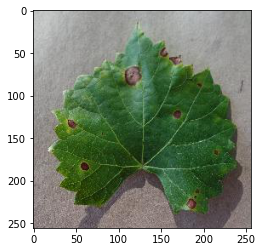

In [37]:
plt.imshow(X_test[i])